In [ ]:
"""
In this code, I have a theory on estimating the size of \tilde{\epsilon} by working through the entries of this matrix. Without prior knowledge of matrix A,
I assume it is likely that the individual entries of U_A, denoted u _{ij} will be of order(1/\sqrt{n}) and hence I shall used this to my advantage to estimate
the norm size of \tilde{\epsilon.
"""

Singular values: [1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]

Case 1 (perturb largest SV):
U^T V diagonal elements: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(I - U^T V)[0,0] = 0.000000
||(I - U^T V)||_2 = 1.999445

Case 2 (perturb smallest SV):
U^T V diagonal elements: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(I - U^T V)[9,9] = 0.000000
||(I - U^T V)||_2 = 1.999971


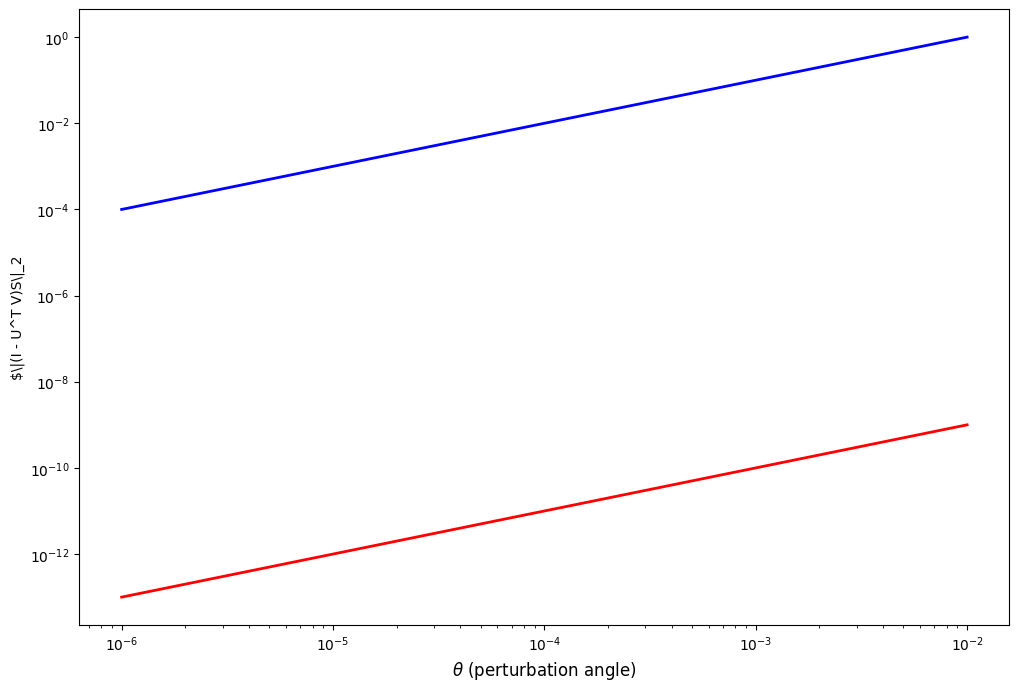

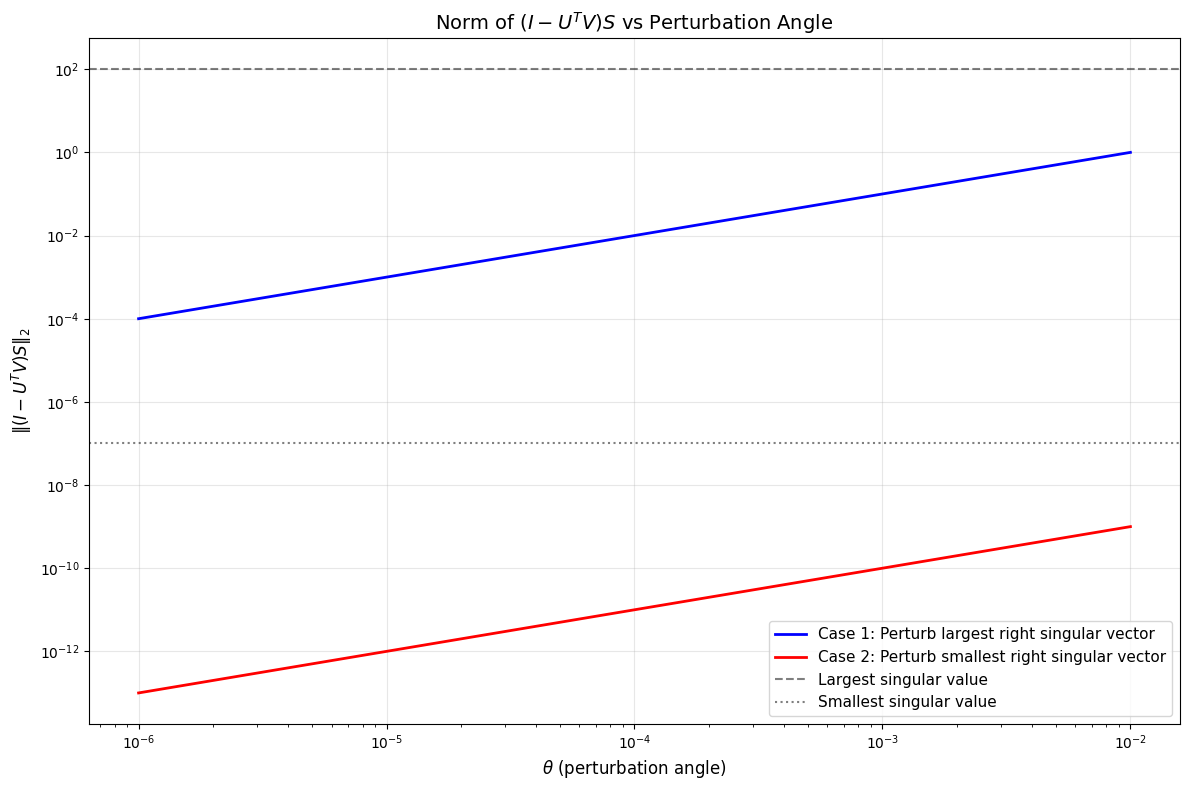


Singular values: [1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]
Largest singular value: 1.00e+02
Smallest singular value: 1.00e-07
Condition number: 1.00e+09

Final norms at theta = 1.00e-02:
Case 1 (largest SV): 1.00e+00
Case 2 (smallest SV): 1.00e-09

Theoretical insights:
When perturbing the largest singular vector direction:
  - We expect the norm to be dominated by the largest singular value
  - Norm ≈ 1.00e+02 for small perturbations
When perturbing the smallest singular vector direction:
  - The effect should be smaller since the singular value is small
  - Norm ≈ 1.00e-07 for small perturbations


C:\Users\aleks\AppData\Local\Temp\ipykernel_35044\2997569051.py:126: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=11)


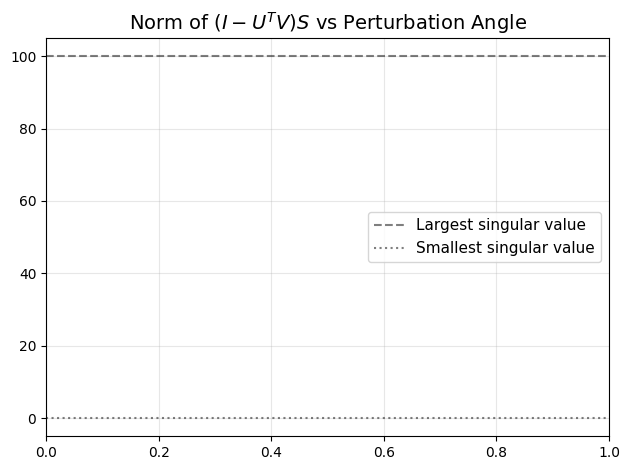


Largest singular value: 1.00e+02
Smallest singular value: 1.00e-07
Condition number: 1.00e+09

Final norms at theta = 1.00e-02:
Case 1 (largest SV): 1.00e+00
Case 2 (smallest SV): 1.00e-09

Expected behavior:
Case 1: ||(I - U^T V)S||_2 should be dominated by largest SV ≈ 1.00e+02
Case 2: ||(I - U^T V)S||_2 should be dominated by smallest SV ≈ 1.00e-07


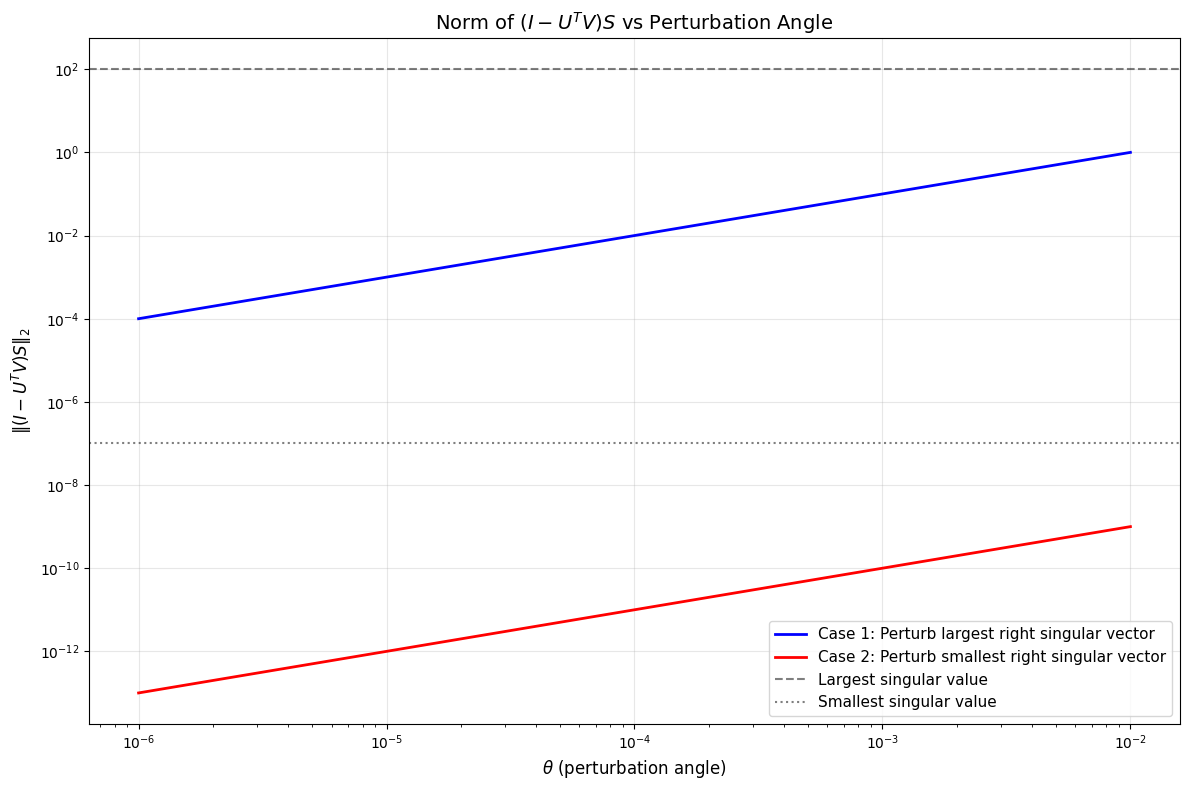


Singular values: [1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]
Largest singular value: 1.00e+02
Smallest singular value: 1.00e-07
Condition number: 1.00e+09

Final norms at theta = 1.00e-02:
Case 1 (largest SV): 1.00e+00
Case 2 (smallest SV): 1.00e-09

Theoretical insights:
When perturbing the largest singular vector direction:
  - We expect the norm to be dominated by the largest singular value
  - Norm ≈ 1.00e+02 for small perturbations
When perturbing the smallest singular vector direction:
  - The effect should be smaller since the singular value is small
  - Norm ≈ 1.00e-07 for small perturbations


In [ ]:
import numpy as np 
import scipy
import matplotlib.pyplot as plt

n, r = 100, 10
rng = np.random.default_rng(123)

# Create U and singular values using your approach
U_A, _ = scipy.linalg.qr(rng.standard_normal((n, r)), mode='economic')
sing_vals_A = np.logspace(-7, 2, r)[::-1]
S_A = np.diag(sing_vals_A)

# Create full n×n diagonal matrix S_full (padded with zeros)
S_full = np.zeros((n, n))
S_full[:r, :r] = S_A

# Extend U_A to full n×n orthogonal matrix
U_full, _ = scipy.linalg.qr(np.hstack([U_A, rng.standard_normal((n, n-r))]))

print(f"Singular values: {sing_vals_A}")

thetas = np.linspace(1e-6, 1e-2, 200)

# Store norms of (I - U^T V)S
norm_IUVS_A1, norm_IUVS_A2 = [], []

for theta in thetas:
    # Prepare z (orthogonal to span(U_A), normed)
    z = rng.standard_normal((n, 1))
    z -= U_A @ (U_A.T @ z)
    z /= np.linalg.norm(z)

    # Case 1: Perturb largest singular vector (col 0)
    V_A1 = U_A.copy()
    c, s = np.cos(theta), np.sin(theta)
    V_A1[:, [0]] = c * U_A[:, [0]] + s * z
    V_A1, _ = scipy.linalg.qr(V_A1, mode="economic")
    
    # For full SVD, we only need to look at the r×r block
    # (I - U^T V) will be block diagonal: [r×r block, 0; 0, I]
    # So we can just work with the r×r matrices
    UtV1_rr = U_A.T @ V_A1  # This is r×r
    I_r = np.eye(r)
    I_minus_UtV1_rr = I_r - UtV1_rr
    I_minus_UtV1_S_rr = I_minus_UtV1_rr @ S_A  # r×r operation
    norm_IUVS_A1.append(np.linalg.norm(I_minus_UtV1_S_rr, ord=2))
    
    # Debug: Check structure for first iteration
    if theta == thetas[0]:
        print(f"\nCase 1 (perturb largest SV):")
        print(f"U^T V diagonal elements: {np.diag(UtV1_rr)}")
        print(f"(I - U^T V)[0,0] = {I_minus_UtV1_rr[0,0]:.6f}")
        print(f"||(I - U^T V)||_2 = {np.linalg.norm(I_minus_UtV1_rr, ord=2):.6f}")

    # Case 2: Perturb smallest singular vector (col -1)
    V_A2 = U_A.copy()
    V_A2[:, [-1]] = c * U_A[:, [-1]] + s * z
    V_A2, _ = scipy.linalg.qr(V_A2, mode="economic")
    
    # Again, work with r×r matrices
    UtV2_rr = U_A.T @ V_A2  # This is r×r
    I_minus_UtV2_rr = I_r - UtV2_rr
    I_minus_UtV2_S_rr = I_minus_UtV2_rr @ S_A  # r×r operation
    norm_IUVS_A2.append(np.linalg.norm(I_minus_UtV2_S_rr, ord=2))
    
    # Debug: Check structure for first iteration
    if theta == thetas[0]:
        print(f"\nCase 2 (perturb smallest SV):")
        print(f"U^T V diagonal elements: {np.diag(UtV2_rr)}")
        print(f"(I - U^T V)[{r-1},{r-1}] = {I_minus_UtV2_rr[r-1,r-1]:.6f}")
        print(f"||(I - U^T V)||_2 = {np.linalg.norm(I_minus_UtV2_rr, ord=2):.6f}")

# Create the plot
plt.figure(figsize=(12, 8))
plt.loglog(thetas, norm_IUVS_A1, 'b-', label='Case 1: Perturb largest right singular vector', linewidth=2)
plt.loglog(thetas, norm_IUVS_A2, 'r-', label='Case 2: Perturb smallest right singular vector', linewidth=2)

plt.xlabel(r'$\theta$ (perturbation angle)', fontsize=12)
plt.ylabel(r'$\|(I - U^T V)S\|_2')

# Create the plot
plt.figure(figsize=(12, 8))
plt.loglog(thetas, norm_IUVS_A1, 'b-', label='Case 1: Perturb largest right singular vector', linewidth=2)
plt.loglog(thetas, norm_IUVS_A2, 'r-', label='Case 2: Perturb smallest right singular vector', linewidth=2)

plt.xlabel(r'$\theta$ (perturbation angle)', fontsize=12)
plt.ylabel(r'$\|(I - U^T V)S\|_2$', fontsize=12)
plt.title('Norm of $(I - U^T V)S$ vs Perturbation Angle', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add reference lines for singular values
plt.axhline(y=sing_vals_A[0], color='k', linestyle='--', alpha=0.5, label='Largest singular value')
plt.axhline(y=sing_vals_A[-1], color='k', linestyle=':', alpha=0.5, label='Smallest singular value')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# Print diagnostics
print(f"\nSingular values: {sing_vals_A}")
print(f"Largest singular value: {sing_vals_A[0]:.2e}")
print(f"Smallest singular value: {sing_vals_A[-1]:.2e}")
print(f"Condition number: {sing_vals_A[0]/sing_vals_A[-1]:.2e}")

# Show final norms for largest theta
final_idx = -1
print(f"\nFinal norms at theta = {thetas[final_idx]:.2e}:")
print(f"Case 1 (largest SV): {norm_IUVS_A1[final_idx]:.2e}")
print(f"Case 2 (smallest SV): {norm_IUVS_A2[final_idx]:.2e}")

# Theoretical analysis
print(f"\nTheoretical insights:")
print(f"When perturbing the largest singular vector direction:")
print(f"  - We expect the norm to be dominated by the largest singular value")
print(f"  - Norm ≈ {sing_vals_A[0]:.2e} for small perturbations")
print(f"When perturbing the smallest singular vector direction:")
print(f"  - The effect should be smaller since the singular value is small")
print(f"  - Norm ≈ {sing_vals_A[-1]:.2e} for small perturbations")

plt.title('Norm of $(I - U^T V)S$ vs Perturbation Angle', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add reference lines for singular values
plt.axhline(y=sing_vals_A[0], color='k', linestyle='--', alpha=0.5, label='Largest singular value')
plt.axhline(y=sing_vals_A[-1], color='k', linestyle=':', alpha=0.5, label='Smallest singular value')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# Print diagnostics
print(f"\nLargest singular value: {sing_vals_A[0]:.2e}")
print(f"Smallest singular value: {sing_vals_A[-1]:.2e}")
print(f"Condition number: {sing_vals_A[0]/sing_vals_A[-1]:.2e}")

# Show final norms for largest theta
final_idx = -1
print(f"\nFinal norms at theta = {thetas[final_idx]:.2e}:")
print(f"Case 1 (largest SV): {norm_IUVS_A1[final_idx]:.2e}")
print(f"Case 2 (smallest SV): {norm_IUVS_A2[final_idx]:.2e}")

print(f"\nExpected behavior:")
print(f"Case 1: ||(I - U^T V)S||_2 should be dominated by largest SV ≈ {sing_vals_A[0]:.2e}")
print(f"Case 2: ||(I - U^T V)S||_2 should be dominated by smallest SV ≈ {sing_vals_A[-1]:.2e}")

# Create the plot
plt.figure(figsize=(12, 8))
plt.loglog(thetas, norm_IUVS_A1, 'b-', label='Case 1: Perturb largest right singular vector', linewidth=2)
plt.loglog(thetas, norm_IUVS_A2, 'r-', label='Case 2: Perturb smallest right singular vector', linewidth=2)

plt.xlabel(r'$\theta$ (perturbation angle)', fontsize=12)
plt.ylabel(r'$\|(I - U^T V)S\|_2$', fontsize=12)
plt.title('Norm of $(I - U^T V)S$ vs Perturbation Angle', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add reference lines for singular values
plt.axhline(y=sing_vals_A[0], color='k', linestyle='--', alpha=0.5, label='Largest singular value')
plt.axhline(y=sing_vals_A[-1], color='k', linestyle=':', alpha=0.5, label='Smallest singular value')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# Print diagnostics
print(f"\nSingular values: {sing_vals_A}")
print(f"Largest singular value: {sing_vals_A[0]:.2e}")
print(f"Smallest singular value: {sing_vals_A[-1]:.2e}")
print(f"Condition number: {sing_vals_A[0]/sing_vals_A[-1]:.2e}")

# Show final norms for largest theta
final_idx = -1
print(f"\nFinal norms at theta = {thetas[final_idx]:.2e}:")
print(f"Case 1 (largest SV): {norm_IUVS_A1[final_idx]:.2e}")
print(f"Case 2 (smallest SV): {norm_IUVS_A2[final_idx]:.2e}")

# Theoretical analysis
print(f"\nTheoretical insights:")
print(f"When perturbing the largest singular vector direction:")
print(f"  - We expect the norm to be dominated by the largest singular value")
print(f"  - Norm ≈ {sing_vals_A[0]:.2e} for small perturbations")
print(f"When perturbing the smallest singular vector direction:")
print(f"  - The effect should be smaller since the singular value is small")
print(f"  - Norm ≈ {sing_vals_A[-1]:.2e} for small perturbations")

Singular values: [1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]

Case 1 (perturb largest SV):
U^T V diagonal elements: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(I - U^T V)[0,0] = 0.000000
||(I - U^T V)||_2 = 1.999445

Case 2 (perturb smallest SV):
U^T V diagonal elements: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(I - U^T V)[9,9] = 0.000000
||(I - U^T V)||_2 = 1.999971


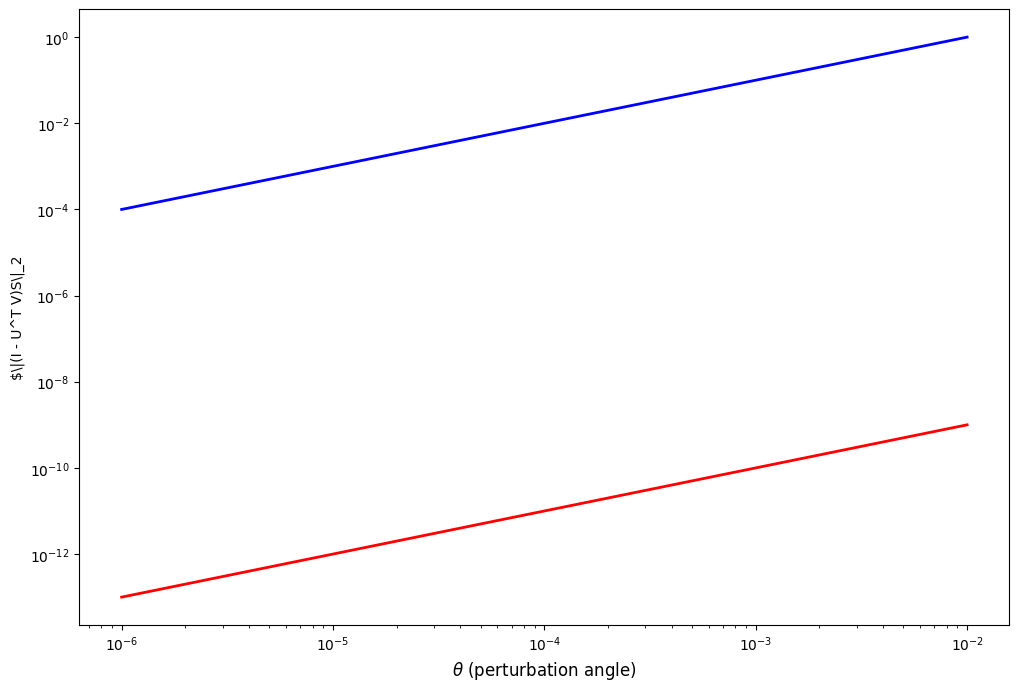

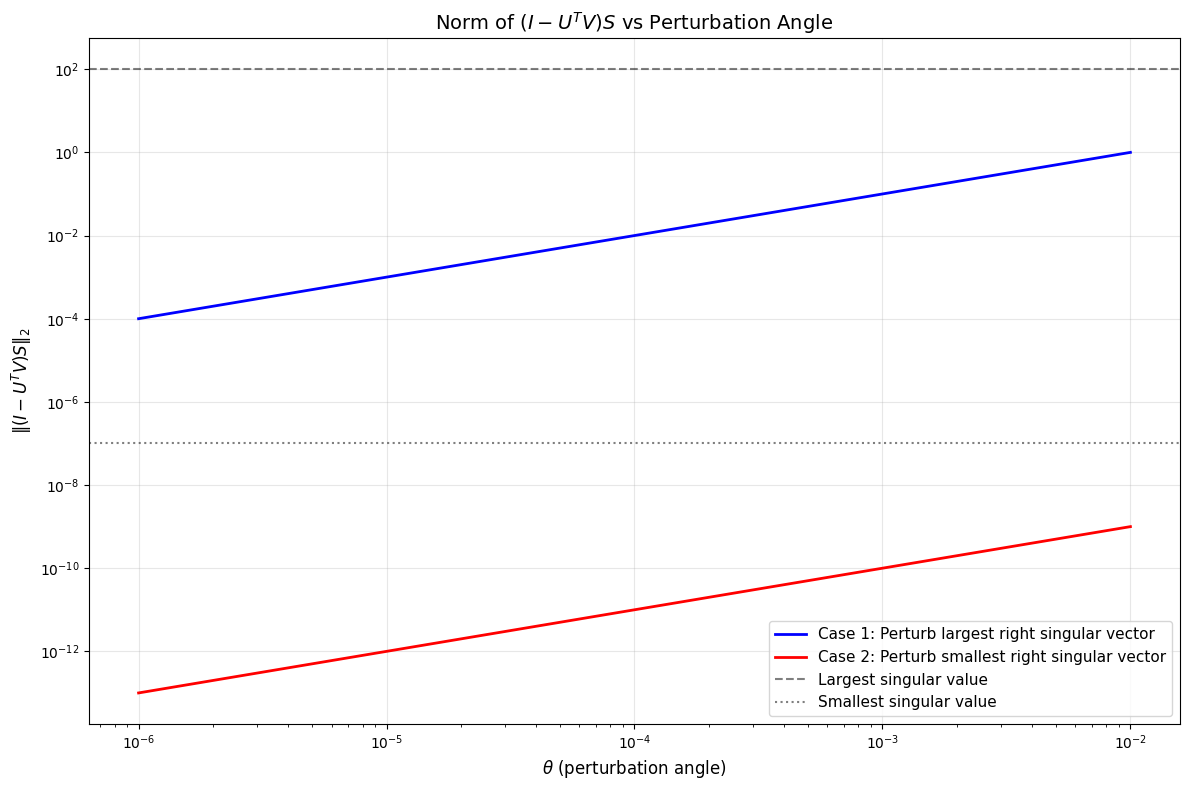


Singular values: [1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]
Largest singular value: 1.00e+02
Smallest singular value: 1.00e-07
Condition number: 1.00e+09

Final norms at theta = 1.00e-02:
Case 1 (largest SV): 1.00e+00
Case 2 (smallest SV): 1.00e-09

Theoretical insights:
When perturbing the largest singular vector direction:
  - We expect the norm to be dominated by the largest singular value
  - Norm ≈ 1.00e+02 for small perturbations
When perturbing the smallest singular vector direction:
  - The effect should be smaller since the singular value is small
  - Norm ≈ 1.00e-07 for small perturbations


C:\Users\aleks\AppData\Local\Temp\ipykernel_35044\2997569051.py:126: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=11)


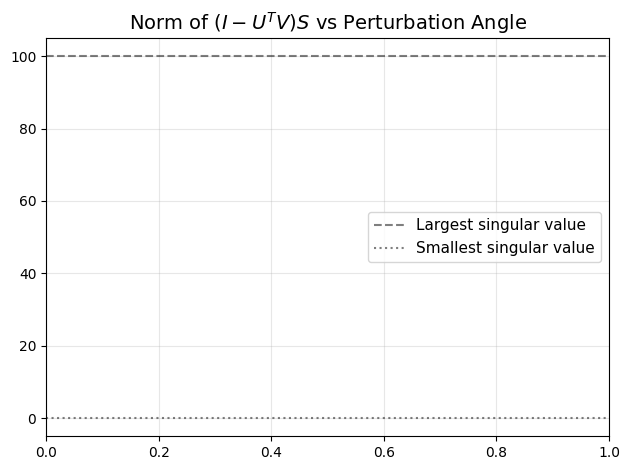


Largest singular value: 1.00e+02
Smallest singular value: 1.00e-07
Condition number: 1.00e+09

Final norms at theta = 1.00e-02:
Case 1 (largest SV): 1.00e+00
Case 2 (smallest SV): 1.00e-09

Expected behavior:
Case 1: ||(I - U^T V)S||_2 should be dominated by largest SV ≈ 1.00e+02
Case 2: ||(I - U^T V)S||_2 should be dominated by smallest SV ≈ 1.00e-07


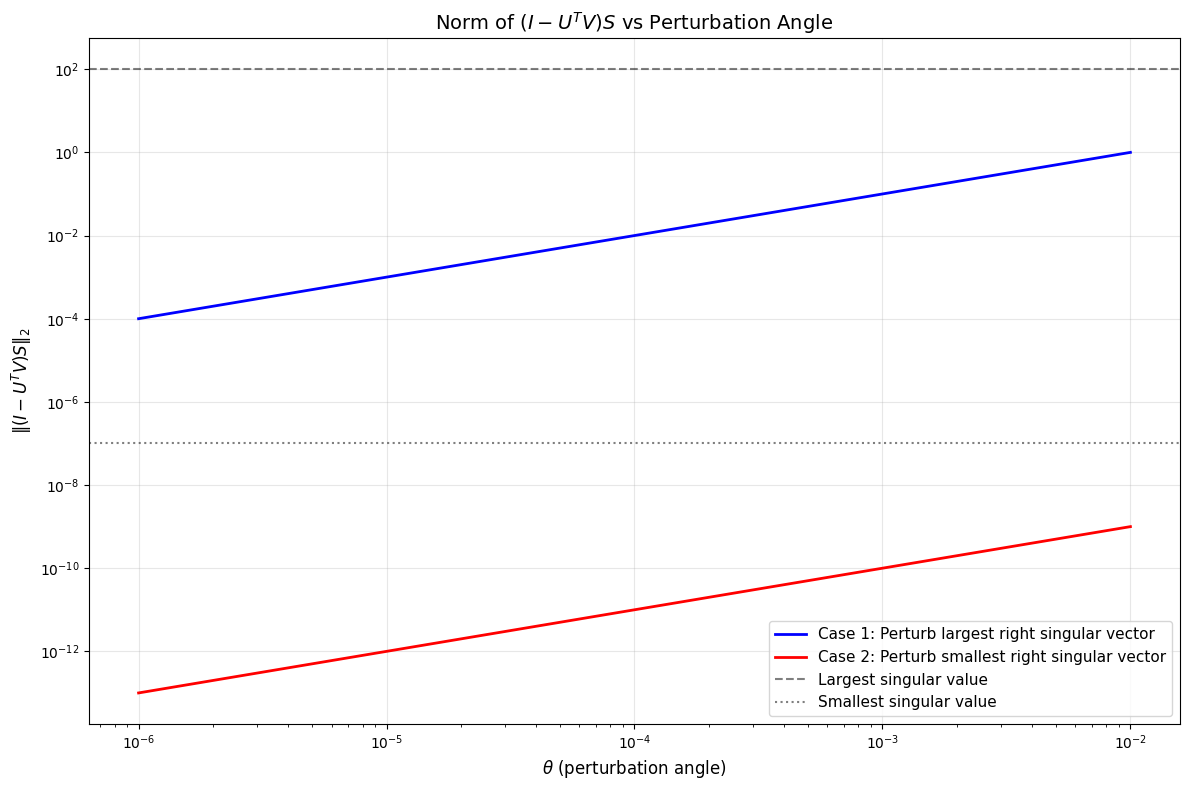


Singular values: [1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]
Largest singular value: 1.00e+02
Smallest singular value: 1.00e-07
Condition number: 1.00e+09

Final norms at theta = 1.00e-02:
Case 1 (largest SV): 1.00e+00
Case 2 (smallest SV): 1.00e-09

Theoretical insights:
When perturbing the largest singular vector direction:
  - We expect the norm to be dominated by the largest singular value
  - Norm ≈ 1.00e+02 for small perturbations
When perturbing the smallest singular vector direction:
  - The effect should be smaller since the singular value is small
  - Norm ≈ 1.00e-07 for small perturbations


In [ ]:
import numpy as np 
import scipy
import matplotlib.pyplot as plt

n, r = 100, 10
rng = np.random.default_rng(123)

# Create U and singular values using your approach
U_A, _ = scipy.linalg.qr(rng.standard_normal((n, r)), mode='economic')
sing_vals_A = np.logspace(-7, 2, r)[::-1]
S_A = np.diag(sing_vals_A)

# Create full n×n diagonal matrix S_full (padded with zeros)
S_full = np.zeros((n, n))
S_full[:r, :r] = S_A

# Extend U_A to full n×n orthogonal matrix
U_full, _ = scipy.linalg.qr(np.hstack([U_A, rng.standard_normal((n, n-r))]))

print(f"Singular values: {sing_vals_A}")

thetas = np.linspace(1e-6, 1e-2, 200)

# Store norms of (I - U^T V)S
norm_IUVS_A1, norm_IUVS_A2 = [], []

for theta in thetas:
    # Prepare z (orthogonal to span(U_A), normed)
    z = rng.standard_normal((n, 1))
    z -= U_A @ (U_A.T @ z)
    z /= np.linalg.norm(z)

    # Case 1: Perturb largest singular vector (col 0)
    V_A1 = U_A.copy()
    c, s = np.cos(theta), np.sin(theta)
    V_A1[:, [0]] = c * U_A[:, [0]] + s * z
    V_A1, _ = scipy.linalg.qr(V_A1, mode="economic")
    
    # For full SVD, we only need to look at the r×r block
    # (I - U^T V) will be block diagonal: [r×r block, 0; 0, I]
    # So we can just work with the r×r matrices
    UtV1_rr = U_A.T @ V_A1  # This is r×r
    I_r = np.eye(r)
    I_minus_UtV1_rr = I_r - UtV1_rr
    I_minus_UtV1_S_rr = I_minus_UtV1_rr @ S_A  # r×r operation
    norm_IUVS_A1.append(np.linalg.norm(I_minus_UtV1_S_rr, ord=2))
    
    # Debug: Check structure for first iteration
    if theta == thetas[0]:
        print(f"\nCase 1 (perturb largest SV):")
        print(f"U^T V diagonal elements: {np.diag(UtV1_rr)}")
        print(f"(I - U^T V)[0,0] = {I_minus_UtV1_rr[0,0]:.6f}")
        print(f"||(I - U^T V)||_2 = {np.linalg.norm(I_minus_UtV1_rr, ord=2):.6f}")

    # Case 2: Perturb smallest singular vector (col -1)
    V_A2 = U_A.copy()
    V_A2[:, [-1]] = c * U_A[:, [-1]] + s * z
    V_A2, _ = scipy.linalg.qr(V_A2, mode="economic")
    
    # Again, work with r×r matrices
    UtV2_rr = U_A.T @ V_A2  # This is r×r
    I_minus_UtV2_rr = I_r - UtV2_rr
    I_minus_UtV2_S_rr = I_minus_UtV2_rr @ S_A  # r×r operation
    norm_IUVS_A2.append(np.linalg.norm(I_minus_UtV2_S_rr, ord=2))
    
    # Debug: Check structure for first iteration
    if theta == thetas[0]:
        print(f"\nCase 2 (perturb smallest SV):")
        print(f"U^T V diagonal elements: {np.diag(UtV2_rr)}")
        print(f"(I - U^T V)[{r-1},{r-1}] = {I_minus_UtV2_rr[r-1,r-1]:.6f}")
        print(f"||(I - U^T V)||_2 = {np.linalg.norm(I_minus_UtV2_rr, ord=2):.6f}")

# Create the plot
plt.figure(figsize=(12, 8))
plt.loglog(thetas, norm_IUVS_A1, 'b-', label='Case 1: Perturb largest right singular vector', linewidth=2)
plt.loglog(thetas, norm_IUVS_A2, 'r-', label='Case 2: Perturb smallest right singular vector', linewidth=2)

plt.xlabel(r'$\theta$ (perturbation angle)', fontsize=12)
plt.ylabel(r'$\|(I - U^T V)S\|_2')

# Create the plot
plt.figure(figsize=(12, 8))
plt.loglog(thetas, norm_IUVS_A1, 'b-', label='Case 1: Perturb largest right singular vector', linewidth=2)
plt.loglog(thetas, norm_IUVS_A2, 'r-', label='Case 2: Perturb smallest right singular vector', linewidth=2)

plt.xlabel(r'$\theta$ (perturbation angle)', fontsize=12)
plt.ylabel(r'$\|(I - U^T V)S\|_2$', fontsize=12)
plt.title('Norm of $(I - U^T V)S$ vs Perturbation Angle', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add reference lines for singular values
plt.axhline(y=sing_vals_A[0], color='k', linestyle='--', alpha=0.5, label='Largest singular value')
plt.axhline(y=sing_vals_A[-1], color='k', linestyle=':', alpha=0.5, label='Smallest singular value')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# Print diagnostics
print(f"\nSingular values: {sing_vals_A}")
print(f"Largest singular value: {sing_vals_A[0]:.2e}")
print(f"Smallest singular value: {sing_vals_A[-1]:.2e}")
print(f"Condition number: {sing_vals_A[0]/sing_vals_A[-1]:.2e}")

# Show final norms for largest theta
final_idx = -1
print(f"\nFinal norms at theta = {thetas[final_idx]:.2e}:")
print(f"Case 1 (largest SV): {norm_IUVS_A1[final_idx]:.2e}")
print(f"Case 2 (smallest SV): {norm_IUVS_A2[final_idx]:.2e}")

# Theoretical analysis
print(f"\nTheoretical insights:")
print(f"When perturbing the largest singular vector direction:")
print(f"  - We expect the norm to be dominated by the largest singular value")
print(f"  - Norm ≈ {sing_vals_A[0]:.2e} for small perturbations")
print(f"When perturbing the smallest singular vector direction:")
print(f"  - The effect should be smaller since the singular value is small")
print(f"  - Norm ≈ {sing_vals_A[-1]:.2e} for small perturbations")

plt.title('Norm of $(I - U^T V)S$ vs Perturbation Angle', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add reference lines for singular values
plt.axhline(y=sing_vals_A[0], color='k', linestyle='--', alpha=0.5, label='Largest singular value')
plt.axhline(y=sing_vals_A[-1], color='k', linestyle=':', alpha=0.5, label='Smallest singular value')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# Print diagnostics
print(f"\nLargest singular value: {sing_vals_A[0]:.2e}")
print(f"Smallest singular value: {sing_vals_A[-1]:.2e}")
print(f"Condition number: {sing_vals_A[0]/sing_vals_A[-1]:.2e}")

# Show final norms for largest theta
final_idx = -1
print(f"\nFinal norms at theta = {thetas[final_idx]:.2e}:")
print(f"Case 1 (largest SV): {norm_IUVS_A1[final_idx]:.2e}")
print(f"Case 2 (smallest SV): {norm_IUVS_A2[final_idx]:.2e}")

print(f"\nExpected behavior:")
print(f"Case 1: ||(I - U^T V)S||_2 should be dominated by largest SV ≈ {sing_vals_A[0]:.2e}")
print(f"Case 2: ||(I - U^T V)S||_2 should be dominated by smallest SV ≈ {sing_vals_A[-1]:.2e}")

# Create the plot
plt.figure(figsize=(12, 8))
plt.loglog(thetas, norm_IUVS_A1, 'b-', label='Case 1: Perturb largest right singular vector', linewidth=2)
plt.loglog(thetas, norm_IUVS_A2, 'r-', label='Case 2: Perturb smallest right singular vector', linewidth=2)

plt.xlabel(r'$\theta$ (perturbation angle)', fontsize=12)
plt.ylabel(r'$\|(I - U^T V)S\|_2$', fontsize=12)
plt.title('Norm of $(I - U^T V)S$ vs Perturbation Angle', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add reference lines for singular values
plt.axhline(y=sing_vals_A[0], color='k', linestyle='--', alpha=0.5, label='Largest singular value')
plt.axhline(y=sing_vals_A[-1], color='k', linestyle=':', alpha=0.5, label='Smallest singular value')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# Print diagnostics
print(f"\nSingular values: {sing_vals_A}")
print(f"Largest singular value: {sing_vals_A[0]:.2e}")
print(f"Smallest singular value: {sing_vals_A[-1]:.2e}")
print(f"Condition number: {sing_vals_A[0]/sing_vals_A[-1]:.2e}")

# Show final norms for largest theta
final_idx = -1
print(f"\nFinal norms at theta = {thetas[final_idx]:.2e}:")
print(f"Case 1 (largest SV): {norm_IUVS_A1[final_idx]:.2e}")
print(f"Case 2 (smallest SV): {norm_IUVS_A2[final_idx]:.2e}")

# Theoretical analysis
print(f"\nTheoretical insights:")
print(f"When perturbing the largest singular vector direction:")
print(f"  - We expect the norm to be dominated by the largest singular value")
print(f"  - Norm ≈ {sing_vals_A[0]:.2e} for small perturbations")
print(f"When perturbing the smallest singular vector direction:")
print(f"  - The effect should be smaller since the singular value is small")
print(f"  - Norm ≈ {sing_vals_A[-1]:.2e} for small perturbations")